# 02 Example - Property Scans with Multi-Dimensional Data

In [1]:
import pyscan as ps
import matplotlib.pyplot as plt
import numpy as np

## Setup devices

In [2]:
devices = ps.ItemAttribute()

devices.v1 = ps.TestVoltage() # Device 1
devices.v2 = ps.TestVoltage() # Device 2
devices.v3 = ps.TestVoltage() # Device 3

## Define a measure function

In [3]:
def generate_multiD_data(expt):
    """
    Generates fake data:
    x0 - 0D data (point)
    x1 - 1D data (line)
    x2 - 2D data (grid)
    """
     
    runinfo = expt.runinfo
    devices = expt.devices

    d = ps.ItemAttribute()

    d.v1 = devices.v1.voltage
    d.v2 = devices.v2.voltage
    d.v3 = devices.v3.voltage

    v = d.v1 + d.v2 + d.v3
    
    d.x0 = v # point data
    d.x1 = [v + i for i in range(5)] # line data
    d.x2 = [[v + i + j for i in range(5)] for j in range(5)] # grid data
    
    return d

## Experiments

### 1. 1D Scan, point data

In [4]:
# This is the same as the first example in example notebook 01
runinfo = ps.RunInfo()

runinfo.scan0 = ps.PropertyScan({'v1': ps.drange(0, 1, 10)}, prop='voltage', dt=0.01)

runinfo.measure_function = generate_multiD_data

expt = ps.Experiment(runinfo, devices)
expt.start_thread()


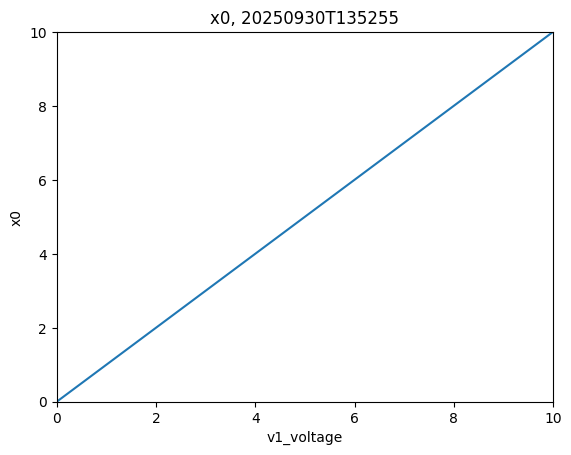

In [5]:
ps.live_plot1D(expt, data_name='x0')

### 2. 1D Scan, line data

In [6]:
# The runinfo is the same as previous 1D scan, but the data captured from the measure_function will be line data instead of point
runinfo = ps.RunInfo()

runinfo.scan0 = ps.PropertyScan({'v1': ps.drange(0, 1, 10)}, prop='voltage', dt=0.01)

runinfo.measure_function = generate_multiD_data

expt = ps.Experiment(runinfo, devices)
expt.start_thread()

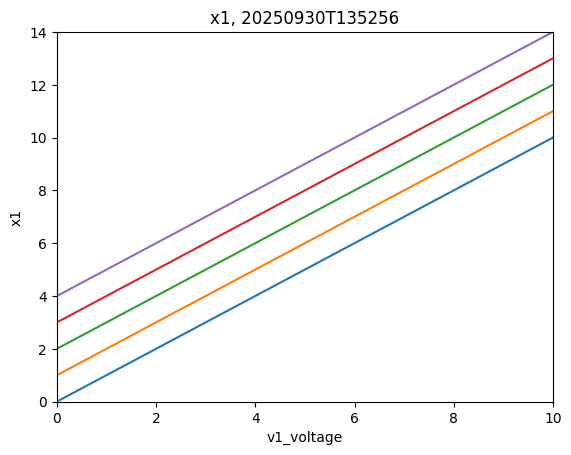

In [7]:
# 1D Plot using line data
ps.live_plot1D(expt, data_name='x1')

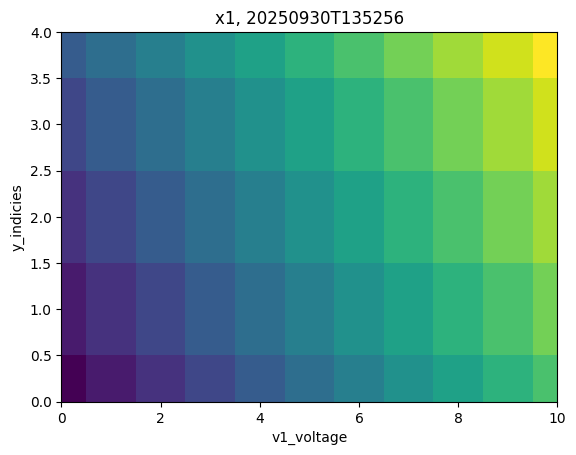

In [8]:
# 2D Plot using line data
ps.live_plot2D(expt, data_name='x1')

### 3. 1D Scan, grid data

In [9]:
# The runinfo is the same as previous 1D scans, but the data captured from the measure_function will be grid data
runinfo = ps.RunInfo()

runinfo.scan0 = ps.PropertyScan({'v1': ps.drange(0, 1, 10)}, prop='voltage', dt=0.01)

runinfo.measure_function = generate_multiD_data

expt = ps.Experiment(runinfo, devices)
expt.start_thread()

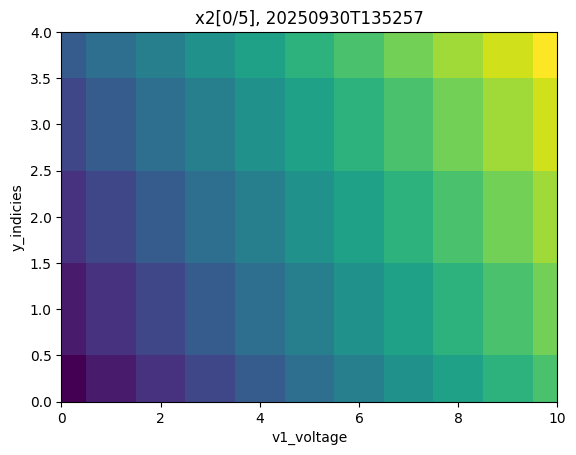

In [10]:
# 2D Plot using grid data
try:
    ps.live_plot2D(expt, data_name='x2')
except KeyboardInterrupt:
    expt.stop()


### 4. 2D Scan, point data

In [11]:
# In this runinfo, two scans are set to PropertyScan, resulting in a 2D scan
runinfo = ps.RunInfo()

runinfo.scan0 = ps.PropertyScan({'v1': ps.drange(0, 0.01, 1)}, prop='voltage', dt=0.01)
runinfo.scan1 = ps.PropertyScan({'v2': ps.drange(0, 0.1, 1)}, prop='voltage', dt=0.01)

runinfo.measure_function = generate_multiD_data

expt = ps.Experiment(runinfo, devices)
expt.start_thread()

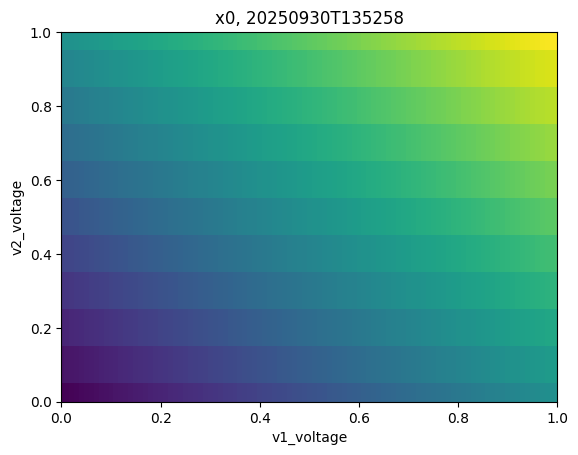

In [12]:
try:
    ps.live_plot2D(expt, data_name='x0')
except KeyboardInterrupt:
    expt.stop()


### 5. 2D Scan, line data

In [13]:
# The runinfo is the same as previous 2D scan, but the data captured from the measure_function will be line data
# Note that a 1D Scan with grid data produces a result of the same dimensions as a 2D scan with line data.
runinfo = ps.RunInfo()

runinfo.scan0 = ps.PropertyScan({'v1': ps.drange(0, 0.01, 1)}, prop='voltage', dt=0.001)
runinfo.scan1 = ps.PropertyScan({'v2': ps.drange(0, 0.1, 1)}, prop='voltage')

runinfo.measure_function = generate_multiD_data

expt = ps.Experiment(runinfo, devices)
expt.start_thread()


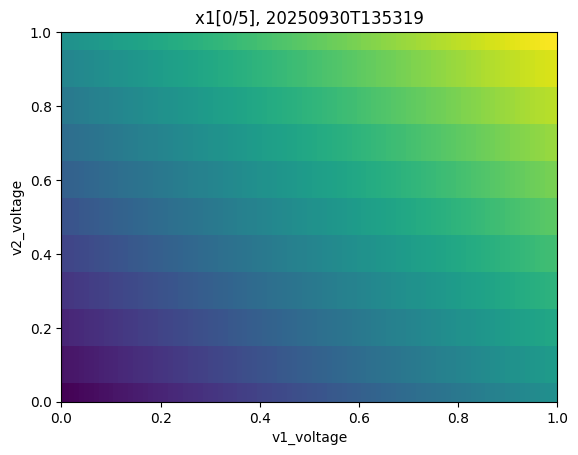

In [14]:
ps.live_plot2D(expt, data_name='x1')